In [1]:
import os.path
from torch.utils.data import DataLoader
from project_function import SummaryDataSet, split_data, TitlePartyModel, run_n_epochs, plot_losses
import torch

In [2]:
token_data_path = os.path.join(os.getcwd(), "..", "data", "tokenized")

In [3]:
maxpool_train_files, maxpool_validation_files, maxpool_test_files = split_data(token_data_path, "maxpool", 0.6)

train: summary_bill_1811_1392983-maxpool.pkl
train: summary_bill_1811_1392984-maxpool.pkl
train: summary_bill_1811_1392985-maxpool.pkl
train: summary_bill_1811_1392986-maxpool.pkl
validate summary_bill_1811_1392988-maxpool.pkl
validate summary_bill_1811_1392989-maxpool.pkl
train: summary_bill_1811_1392990-maxpool.pkl
validate summary_bill_1811_1392991-maxpool.pkl
train: summary_bill_1811_1392992-maxpool.pkl
validate summary_bill_1811_1392994-maxpool.pkl
validate summary_bill_1811_1392995-maxpool.pkl
validate summary_bill_1811_1392996-maxpool.pkl
test : summary_bill_1811_1392997-maxpool.pkl
train: summary_bill_1811_1393000-maxpool.pkl
validate summary_bill_1811_1393001-maxpool.pkl
train: summary_bill_1811_1393002-maxpool.pkl
train: summary_bill_1811_1393003-maxpool.pkl
test : summary_bill_1811_1393005-maxpool.pkl
train: summary_bill_1811_1393007-maxpool.pkl
train: summary_bill_1811_1393008-maxpool.pkl
test : summary_bill_1811_1393009-maxpool.pkl
train: summary_bill_1811_1393010-maxpool.

In [4]:
print(f'{len(maxpool_train_files)} training files, {len(maxpool_validation_files)} validation files, {len(maxpool_test_files)} test files')

1204 training files, 398 validation files, 385 test files


In [5]:
maxpool_train_dataset = SummaryDataSet(maxpool_train_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")
maxpool_validation_dataset = SummaryDataSet(maxpool_validation_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")
maxpool_test_dataset = SummaryDataSet(maxpool_test_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392990-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393000-maxpool.pkl
loading C:\Users\benja\git-project

In [6]:
train_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=False)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
validate_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=False)
test_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=False)

In [7]:
num_epochs = 10
maxpool_model = TitlePartyModel()
if torch.cuda.is_available():
    maxpool_model.cuda()
loss_fun_ms3e = torch.nn.MSELoss()
rms_optimizer = torch.optim.RMSprop(maxpool_model.parameters(), lr=0.01, momentum=0.9)
lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [8]:
torch.autograd.set_detect_anomaly(True)
checkpoint, train_losses, validation_losses = run_n_epochs(num_epochs,
                                                          maxpool_model,
                                                          loss_fun_ms3e,
                                                          rms_optimizer,
                                                          train_dataloader,
                                                          validate_dataloader,
                                                          "maxpool_full",
                                                          lrd_schedulers)

epoch 0
turn on training
running one epoch
data index 0


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.3207, 0.2553, 0.2114, 0.2126]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.15410764515399933
turn off training
epoch loss 0.15410764515399933
applying model.eval()
LOSS train 0.15410764515399933 valid 6.212986244593819e-15
stepping scheduler
epoch 1
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[1.0000e+00, 7.8282e-08, 3.8866e-08, 5.4794e-08]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 6.212986244593819e-15
turn off training
epoch loss 6.212986244593819e-15
applying model.eval()
LOSS train 6.212986244593819e-15 valid 1.276818460235488e-25
stepping scheduler
epoch 2
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[1.0000e+00, 5.4233e-13, 2.6926e-13, 3.7961e-13]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.276818460235488e-25
turn off training
epoch loss

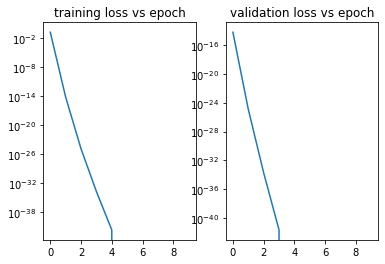

In [9]:
plot_losses(train_losses, validation_losses)

In [13]:
full_maxpool_train_dataset = SummaryDataSet(maxpool_train_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
full_maxpool_validation_dataset = SummaryDataSet(maxpool_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
full_maxpool_test_dataset = SummaryDataSet(maxpool_test_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
fulL_train_dataloader = DataLoader(full_maxpool_train_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
full_validate_dataloader = DataLoader(full_maxpool_validation_dataset, batch_size=1, shuffle=False)
full_test_dataloader = DataLoader(full_maxpool_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392990-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393000-maxpool.pkl
loading C:\Users\benja\git-project

In [17]:
num_epochs = 10
maxpool_full_model = TitlePartyModel()
if torch.cuda.is_available():
    maxpool_full_model.cuda()
loss_fun_ms3e = torch.nn.MSELoss()
full_rms_optimizer = torch.optim.RMSprop(maxpool_model.parameters(), lr=0.01, momentum=0.9)
full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [18]:
full_checkpoint, full_train_losses, full_validation_losses = run_n_epochs(num_epochs,
                                                          maxpool_full_model,
                                                          loss_fun_ms3e,
                                                          full_rms_optimizer,
                                                          fulL_train_dataloader,
                                                          full_validate_dataloader,
                                                          "maxpool_full",
                                                          full_lrd_schedulers)

epoch 0
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.4020, 0.2417, 0.1593, 0.1970]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.12003535032272339
data index 1
data index 2


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


data index 3
data index 4
data index 5
data index 6
data index 7
data index 8
data index 9
data index 10
data index 11
data index 12
data index 13
data index 14
data index 15
data index 16
data index 17
data index 18
data index 19
data index 20
data index 21
data index 22
data index 23
data index 24
data index 25
data index 26
data index 27
data index 28
data index 29
data index 30
data index 31
data index 32
data index 33
data index 34
data index 35
data index 36
data index 37
data index 38
data index 39
data index 40
data index 41
data index 42
data index 43
data index 44
data index 45
data index 46
data index 47
data index 48
data index 49
data index 50
data index 51
data index 52
data index 53
data index 54
data index 55
data index 56
data index 57
data index 58
data index 59
data index 60
data index 61
data index 62
data index 63
data index 64
data index 65
data index 66
data index 67
data index 68
data index 69
data index 70
data index 71
data index 72
data index 73
data index 74

c:\users\benja\git-projects\bitbucket\nlp_legislation_prediction\venvs3\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


data index 7
data index 8
data index 9
data index 10
data index 11
data index 12
data index 13
data index 14
data index 15
data index 16
data index 17
data index 18
data index 19
data index 20
data index 21
data index 22
data index 23
data index 24
data index 25
data index 26
data index 27
data index 28
data index 29
data index 30
data index 31
data index 32
data index 33
data index 34
data index 35
data index 36
data index 37
data index 38
data index 39
data index 40
data index 41
data index 42
data index 43
data index 44
data index 45
data index 46
data index 47
data index 48
data index 49
data index 50
data index 51
data index 52
data index 53
data index 54
data index 55
data index 56
data index 57
data index 58
data index 59
data index 60
data index 61
data index 62
data index 63
data index 64
data index 65
data index 66
data index 67
data index 68
data index 69
data index 70
data index 71
data index 72
data index 73
data index 74
data index 75
data index 76
data index 77
data inde

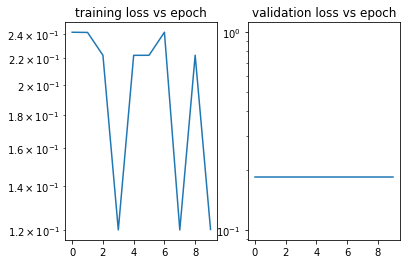

In [19]:
plot_losses(full_train_losses, full_validation_losses)